In [1]:
## PO Reading

In [2]:
## import the necessary packages
from skimage.exposure import rescale_intensity
import numpy as np
from PIL import Image
import pytesseract
import cv2
from pytesseract import Output
import pandas as pd
import math
import re

width/columns = 2528, height/rows = 3504


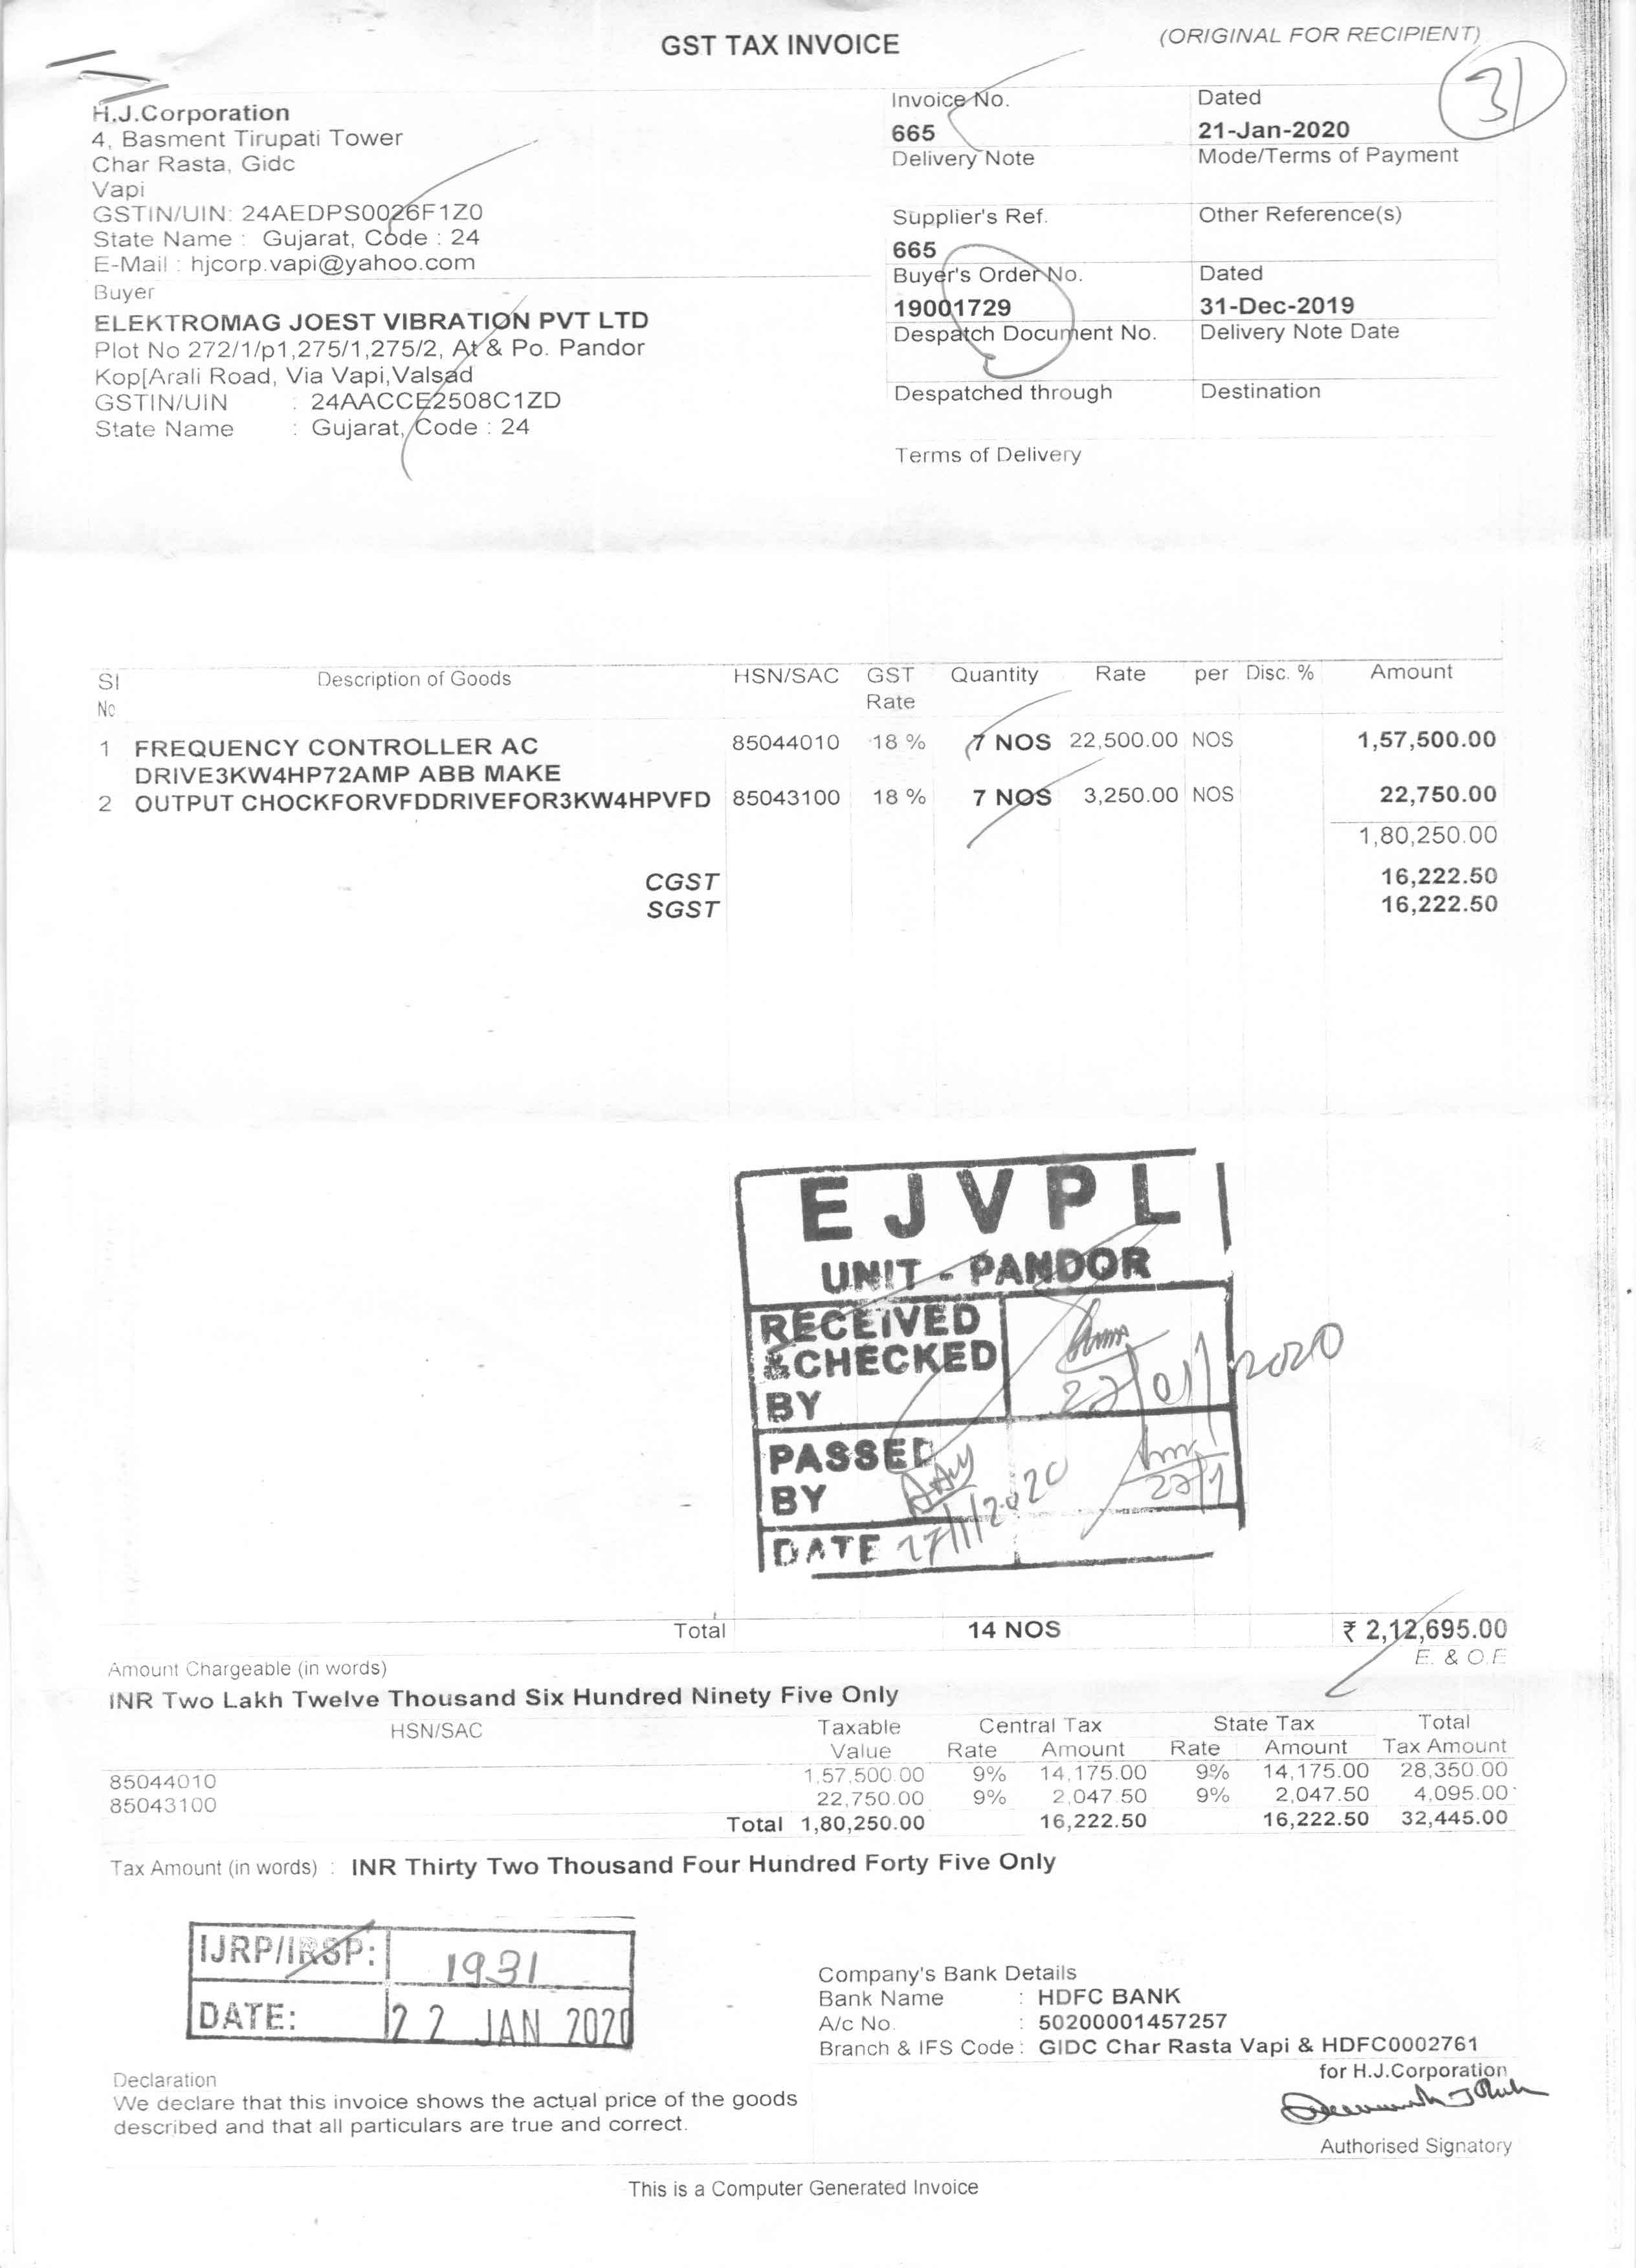

In [7]:
image_1 = cv2.imread("INVOICE1.jpg", 0) ## Loading image directly as black & white.
(H, W) = image_1.shape # H = no. of rows, W = no. of columns
print("width/columns = {}, height/rows = {}".format(W, H))
# Display in original size :
#image_pil_1 = Image.fromarray(image_1[0:1000, :])
image_pil_1 = Image.fromarray(image_1)
display(image_pil_1) 

In [4]:
## Converting image to text and create pandas dataframe with all text cordinates and making texts in lower case

image_1_data = pytesseract.image_to_data(image_1, output_type=Output.DICT)
image_1_pd = pd.DataFrame(image_1_data)

image_1_pd_sorted =image_1_pd.sort_values(['top', 'left']).reset_index()
image_1_pd_sorted['text'] = image_1_pd_sorted['text'].map(lambda x: x if type(x)!=str else x.lower()) ## make Items in lower case

image_1_pd_sorted[75:125]

,index,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
75,83,6,93,42,272,5,1,1,5,:,389,12,2
76,84,6,89,34,297,5,1,1,5,hjcorp.vapi@yahoo.com,393,436,3
77,82,6,92,24,147,5,1,1,5,e—mail,396,109,1
78,94,6,62,1,2071,5,1,1,5,»,402,9,13
79,91,6,41,1,1944,5,1,1,5,b,403,8,10
80,93,6,29,1,2038,5,1,1,5,9,403,1,12
81,89,6,53,1,1835,5,1,1,5,ns,404,61,8
82,87,6,32,1,1674,5,1,1,5,s,405,70,6
83,103,6,52,41,1358,5,1,1,6,_,406,12,7
84,86,6,21,16,1470,5,1,1,5,e,406,106,5


In [10]:
image_1_po_pd= image_1_pd_sorted[image_1_pd_sorted['text'].str.count('^ord')>0].reset_index(drop=True)
image_1_po_pd

,index,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,105,6,91,24,1514,5,1,1,6,orde,412,78,9


In [13]:
## Preparing Invoice dataframe(s) :


pd_po = pd.DataFrame()

len_po = list()

for i in range(len(image_1_po_pd)):
    
    row_index_1 = image_1_po_pd['top'][i] - 20
    row_index_2 = row_index_1 + 100
    col_index_1 = image_1_po_pd['left'][i] - 150
    col_index_2 = col_index_1 + int(W/2)
    if col_index_2 > W:
        col_index_2 = int(W)
    print(row_index_1, row_index_2, col_index_1, col_index_2)
    
    image_1_small = image_1[row_index_1:row_index_2, col_index_1:col_index_2]
    pd_po_data = pytesseract.image_to_data(image_1_small, output_type = Output.DICT)
    
    len_po.append(len(pd_po_data['text']))

    pd_po = pd_po.append(pd.DataFrame(pd_po_data))
    
print(len_po)

pd_po


392 492 1364 2528
[21]


,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,0,-1,100,0,1,0,1,0,,0,1164,0
1,1,-1,29,18,2,0,1,0,,22,59,0
2,1,-1,29,18,3,0,1,1,,22,59,0
3,1,-1,29,18,4,1,1,1,,22,59,0
4,1,91,29,18,5,1,1,1,Buy,22,59,1
5,2,-1,100,18,2,0,1,0,,0,290,0
6,2,-1,100,18,3,0,1,1,,0,290,0
7,2,-1,100,80,4,1,1,1,,0,228,0
8,2,48,100,80,5,1,1,1,ﬁ's,0,56,1
9,2,78,61,150,5,1,1,1,OrderNo.,0,158,2


In [14]:
if len(len_po) > 1:
    

    l = [len_po[0]]
    for i in range(len(len_po)-1):
        l.append(l[i]+len_po[i+1])
    
    l_mod = list()    
  
    l_mod = [0] + l + [max(l)+1]

    pd_po_split = [pd_po.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)]

In [17]:
if len(len_po) > 1:
    

    for i in range(len(len_po)):
        pd_po_split[i]['text'] = pd_po_split[i]['text'].map(lambda x: x if type(x)!=str else x.lower())
        pd_po_split[i]['text'] = pd_po_split[i]['text'].str.replace(r'\b\w\b','') 
        pd_po_split[i]['text'] = pd_po_split[i]['text'].str.replace(r'^[ \t\n]*$','') 
        pd_po_split[i]['text'].replace('', np.nan, inplace = True)
        pd_po_split[i].dropna(subset=['text'], inplace = True)
        pd_po_split[i] = pd_po_split[i].reset_index(drop=True)
else:
    pd_po['text'] = pd_po['text'].map(lambda x: x if type(x)!=str else x.lower())
    pd_po['text'] = pd_po['text'].str.replace(r'\b\w\b','')
    pd_po['text'] = pd_po['text'].str.replace(r'^[ \t\n]*$','')
    pd_po['text'].replace('', np.nan, inplace = True)
    pd_po.dropna(subset=['text'], inplace = True)
    pd_po = pd_po.reset_index(drop=True)
    
pd_po

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,1,91,29,18,5,1,1,1,buy,22,59,1
1,2,48,100,80,5,1,1,1,',0,56,1
2,2,78,61,150,5,1,1,1,orderno.,0,158,2
3,2,95,28,18,5,2,1,1,19001729,70,180,1
4,3,32,30,474,5,1,1,1,‘dated,12,113,1
5,3,91,29,491,5,2,1,1,31—dec—2019,66,237,1


In [18]:
# Following is only for cases where pd_po was not required to be splitted :

dist = np.zeros((len(len_po),(len(pd_po)-1)))
print(dist)


for i in range(len(len_po)): 
    
    iter = len(pd_po)
    iter_lst = [i for  i in range(1, iter)]
    print('iter_lst = ', iter_lst)
    
    for j in iter_lst:
    
        print('1st dist =',  dist[i,(j-1)])
        
        a = (pd_po['left'][j] - pd_po['left'][0])**2
        print('=============', a)
        b = (pd_po['top'][j] - pd_po['top'][0])**2
        print('+++++++++++++++', b)
        
        dist[i, (j-1)] = math.sqrt(a+b)
        print('2nd dist =',  dist[i,(j-1)])
            
dist
            


[[0. 0. 0. 0. 0.]]
iter_lst =  [1, 2, 3, 4, 5]
1st dist = 0.0
============= 3844
+++++++++++++++ 484
2nd dist = 65.7875368135941
1st dist = 0.0
============= 17424
+++++++++++++++ 484
2nd dist = 133.82077566656082
1st dist = 0.0
============= 0
+++++++++++++++ 2304
2nd dist = 48.0
1st dist = 0.0
============= 207936
+++++++++++++++ 100
2nd dist = 456.1096359429386
1st dist = 0.0
============= 223729
+++++++++++++++ 1936
2nd dist = 475.04210339716207


array([[ 65.78753681, 133.82077567,  48.        , 456.10963594,
        475.0421034 ]])

In [21]:
inter_index = np.argwhere(dist == np.min(dist))
print(type(inter_index))
print(inter_index.shape)

po_index = [inter_index[0,0], (inter_index[0,1]+1)]

po_value = pd_po['text'][po_index[1]]

p = re.compile('^[a-zA-Z]+$')  ## '^[a-zA-Z]+$' denotes only letters, no digits

if p.match(po_value) == None:
    print('Purchase Order Number = ', po_value)
else:
    print('Re-think')

<class 'numpy.ndarray'>
(1, 2)
Purchase Order Number =  19001729
